In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dummy-advertising-and-sales-data/Dummy Data HSS.csv


In [56]:
data = pd.read_csv("/kaggle/input/dummy-advertising-and-sales-data/Dummy Data HSS.csv")

In [57]:
print(data.isna().sum())

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64


In [41]:
print(data[['TV', 'Radio', 'Social Media']].dtypes)

TV              float64
Radio           float64
Social Media    float64
dtype: object


In [42]:
print(np.isinf(data[['TV','Radio','Social Media','Sales']]).sum())

TV              0
Radio           0
Social Media    0
Sales           0
dtype: int64


In [58]:
data = data.dropna()

In [45]:
print(data.shape)

(4546, 5)


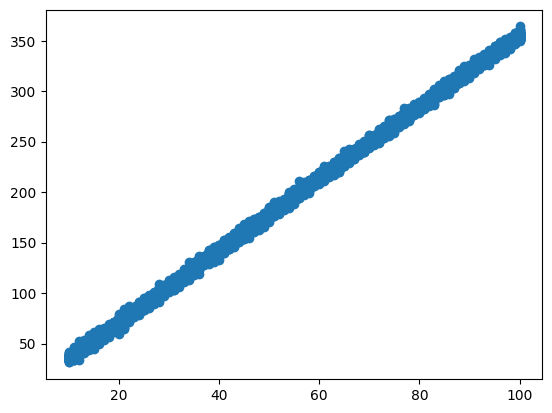

In [46]:
plt.scatter(data.TV,data.Sales)
plt.show()

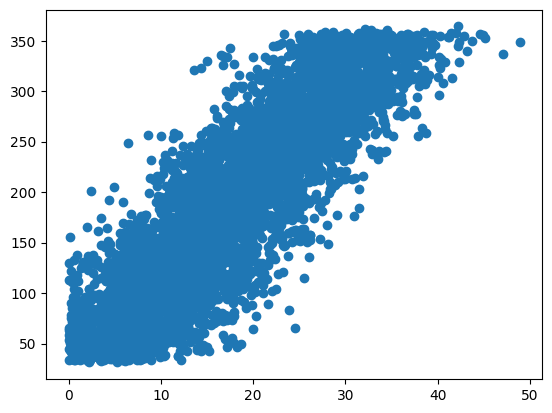

In [47]:
plt.scatter(data.Radio,data.Sales)
plt.show()

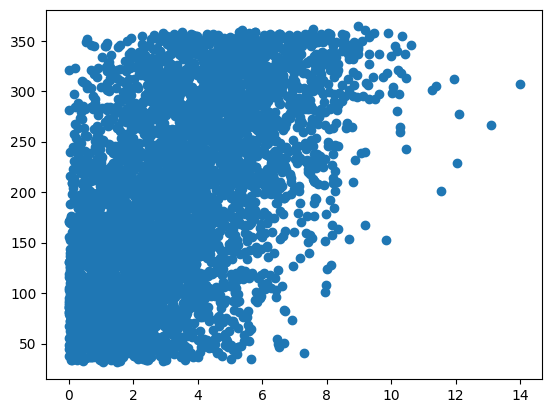

In [5]:
plt.scatter(data['Social Media'],data.Sales)
plt.show()

In [6]:
def loss_function(m1,m2,m3,b,points):
    total_error = 0
    for i in range(len(points)):
        x1,x2,x3,x4 = points.iloc[i].TV,points.iloc[i].Radio,points.iloc[i]['Social Media'],points.iloc[i].Influencer
        y = points.iloc[i].Sales
        y_pred = (m1*x1+m2*x2+m3*x3+b)
        total_error += (y-y_pred)**2
    return total_error/float(len(points))
    
        

In [59]:
def gradient_descent(m1_now,m2_now,m3_now,b_now,points,L):
    m1_gradient,m2_gradient,m3_gradient,b_gradient = 0,0,0,0
    b_gradient = 0
    n = len(points)
    for i in range(n):
        x1 = points.iloc[i].TV
        x2 = points.iloc[i].Radio
        x3 = points.iloc[i]['Social Media']
        #x4 = points.iloc[i].Influencer
        y = points.iloc[i].Sales
        y_pred = (m1_now*x1+m2_now*x2+m3_now*x3+b_now)
        m1_gradient += -(2/n)*x1*(y-y_pred)
        m2_gradient += -(2/n)*x2*(y-y_pred)
        m3_gradient += -(2/n)*x3*(y-y_pred)
        #m4_gradient += -2/n*x4*(y-(m1_now*x1+m2_now*x2+m3_now*x3+m4_now*x4+b_now))
        b_gradient += -(2/n)*(y-y_pred)
    m1 = m1_now - L* m1_gradient
    m2 = m2_now - L* m2_gradient
    m3 = m3_now - L* m3_gradient
    #m4 = m4_now - m4_gradient*L
    b = b_now - L* b_gradient
    return m1,m2,m3,b
        

In [60]:
m1,m2,m3,b = 0,0,0,0
b = 0
L = 0.001   # can be larger now since scaled
epochs = 300

for i in range(epochs):
    if i%100==0:
        print(f"epochs:{i}")
    m1,m2,m3, b = gradient_descent(m1,m2,m3,b, data,L)

print("Final parameters:", m1,m2,m3,b)

epochs:0
epochs:100
epochs:200
Final parameters: -5.821085789275738e+254 -1.9509415145311706e+254 -3.4129758468568904e+253 -8.74068881118059e+252


/usr/local/lib/python3.11/dist-packages/numpy/linalg/linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


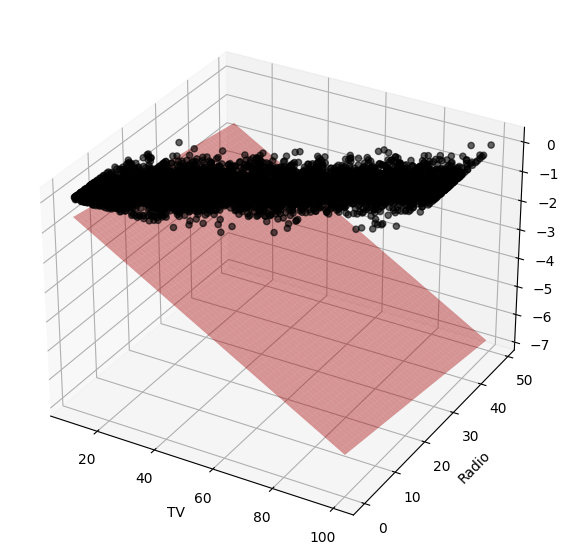

In [62]:


# Prepare data
X = data[['TV', 'Radio']].values
y = data['Sales'].values

# Create a meshgrid for TV and Radio
tv_range = np.linspace(data.TV.min(), data.TV.max(), 50)
radio_range = np.linspace(data.Radio.min(), data.Radio.max(), 50)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)
social_mean = data['Social Media'].mean()
sales_pred = (
    m1*tv_grid + 
    m2*radio_grid + 
    m3*social_mean + 
    b
)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data
ax.scatter(data.TV, data.Radio, data.Sales, color='black', alpha=0.6)

# Regression plane
ax.plot_surface(tv_grid, radio_grid, sales_pred, color='red', alpha=0.4)

# Labels
ax.set_xlabel("TV")
ax.set_ylabel("Radio")
ax.set_zlabel("Sales")
plt.show()


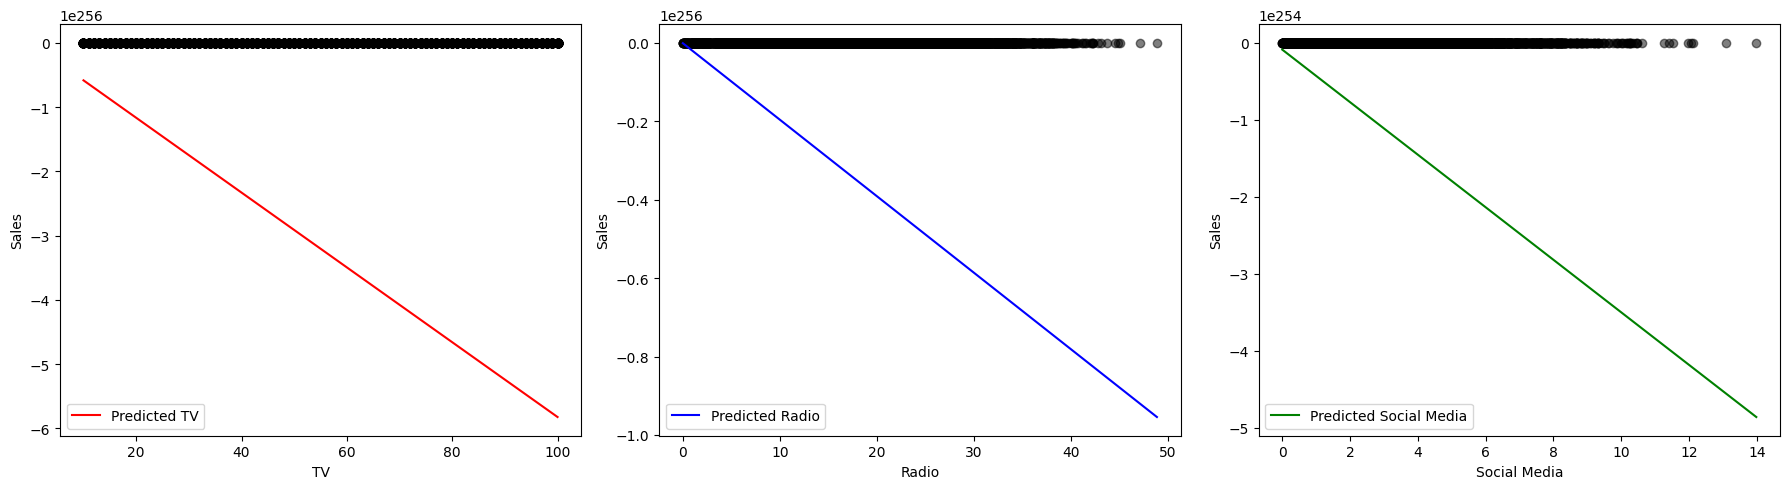

In [61]:
import matplotlib.pyplot as plt
import numpy as np

features = ['TV', 'Radio', 'Social Media']
colors = ['red', 'blue', 'green']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

for i, feature in enumerate(features):
    ax = axes[i]
    
    # Scatter actual data for this feature
    ax.scatter(data[feature], data.Sales, color='black', alpha=0.5)
    
    # Fix other features at mean
    fixed_vals = {f: data[f].mean() for f in features if f != feature}
    
    # X values for line
    x_vals = np.linspace(data[feature].min(), data[feature].max(), 100)
    
    # Predict Sales using the model
    y_vals = (
        m1*x_vals if feature=='TV' else m[0]*fixed_vals['TV']
    ) + (
        m2*x_vals if feature=='Radio' else m[1]*fixed_vals['Radio']
    ) + (
        m3*x_vals if feature=='Social Media' else m[2]*fixed_vals['Social Media']
    ) + b
    
    # Plot line
    ax.plot(x_vals, y_vals, color=colors[i], label=f'Predicted {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel("Sales")
    ax.legend()

plt.tight_layout()
plt.show()
